## 2.1 데이터와 행렬
선형대수(linear algebra)는 데이터 분석에 필요한 각종 계산을 돕는 학문

선형대수를 사용하면 대량의 데이터를 포함하는 복잡한 계산을 간단한 수식으로 서술할 수 있음

In [1]:
import numpy as np
import matplotlib.pylab as plt

### 데이터의 유형
* 스칼라, 벡터, 행렬, 텐서(tensor)

스칼라는 숫자 하나로 이루어진 데이터

벡터는 여러 숫자로 이루어진 데이터 레코드(data record)

행렬은 벡터가 여럿인 데이터 집합

텐서는 같은 크기의 행렬이 여러 개 있는 것

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[0, :] # 첫 번째 꽃의 데이터 (꽃받침 길이, 폭, 꽃잎 길이, 폭)

array([5.1, 3.5, 1.4, 0.2])

### 스칼라
보통 $x$와 같이 소문자로 표기

$$ x \in \mathbb{R} $$

### 벡터

$$ x \in \begin{bmatrix} x_1\\ x_2\\ x_3\\ x_4 \end{bmatrix} $$

$$ x \in \mathbb{R}^4 $$

### 특징 벡터 (feature vector)

데이터 벡터가 예측 문제에서 입력 데이터로 사용되면 특징 벡터라고 한다

### 연습 문제 2.1.1¶
NumPy를 사용해서 붓꽃 데이터 x2에 대한 벡터 변수 x2를 만든다.

예측 문제의 입력 데이터는 대부분 벡터로 표시한다.

예를 들어 숫자 이미지를 입력받아 어떤 숫자인지 분류하는 문제를 생각해보자.

이미지는 원래 2차원 데이터이지만 예측 문제에서는 보통 1차원 벡터로 변환하여 사용한다.

다음은 사이킷런 패키지에서 제공하는 MNIST 숫자 이미지(digit image) 데이터셋이다.

이 데이터는 0부터 9까지의 숫자를 손으로 쓴 후에 8x8 해상도의 이미지로 스캔한 것이다.

다음 코드는 그중 숫자 0과 1의 이미지 8개를 출력한다.

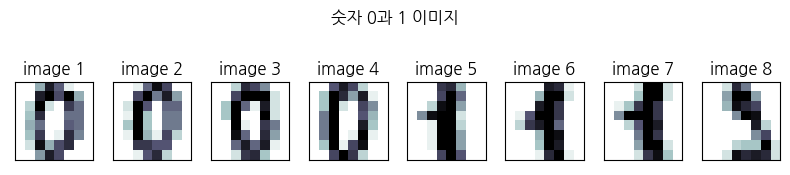

In [9]:
from sklearn.datasets import load_digits  # 패키지 임포트

digits = load_digits()  # 데이터 로드
samples = [0, 10, 20, 30, 1, 11, 21, 31]  # 선택된 이미지 번호
d = []
for i in range(8):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i + 1))
plt.suptitle("숫자 0과 1 이미지")
plt.tight_layout()
plt.show()

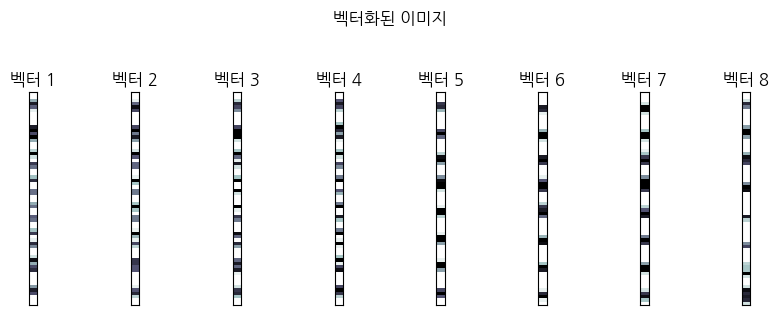

In [11]:
import matplotlib as mpl

# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

v = []
for i in range(8):
    v.append(d[i].reshape(64, 1))  # 벡터화

plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i], aspect=0.4,
            interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("벡터 {}".format(i + 1))
plt.suptitle("벡터화된 이미지", y=1.05)
plt.tight_layout(w_pad=7)
plt.show()

### 텐서 (Tensor)

텐서는 같은 크기의 행렬이 여러 개 같이 묶여 있는 것을 말한다

컬러 이미지는 2차원의 행렬처럼 보이지만 사실 R, G, B의 3가지 이미지가 겹친 것이다

컬러 이미지에서는 각각의 색을 나타내는 행렬을 채널 (channel)이라고 한다

예시 이미지는 크기가 768 X 1024이고 3개의 채널이 있으므로 768 X 1024 X 3 크기의 텐서다

In [12]:
from scipy import misc  # 패키지 임포트

img_rgb = misc.face()  # 컬러 이미지 로드
img_rgb.shape  # 데이터의 모양

(768, 1024, 3)

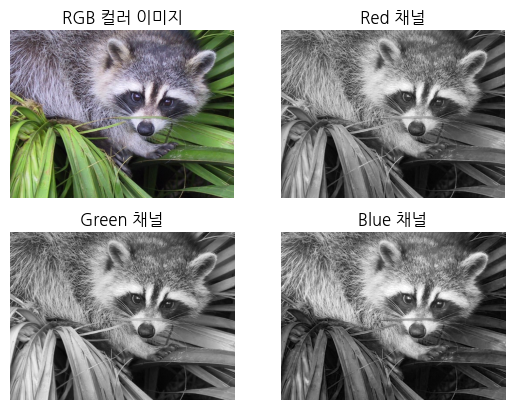

In [13]:
plt.subplot(221)
plt.imshow(img_rgb, cmap=plt.cm.gray)  # 컬러 이미지 출력
plt.axis("off")
plt.title("RGB 컬러 이미지")

plt.subplot(222)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.gray)  # red 채널 출력
plt.axis("off")
plt.title("Red 채널")

plt.subplot(223)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.gray)  # green 채널 출력
plt.axis("off")
plt.title("Green 채널")

plt.subplot(224)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.gray)  # blue 채널 출력
plt.axis("off")
plt.title("Blue 채널")

plt.show()

### 전치 연산 (Transpose)
행렬의 행과 열을 바꾸는 연산

### 대각 행렬 (Diagonal)
모든 비대각 요소가 0인 행렬, 반드시 정방 행렬일 필요는 없음

In [16]:
a = np.diag([1, 2, 3])
print(a)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


### 항등 행렬 (Identity)
대각 행렬 중 모든 대각 성분이 1인 대각 행렬

In [17]:
print(np.identity(3))

print(np.eye(4))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### 대칭 행렬
전치 행렬과 원래의 행렬이 같을 때

$$ S^T = S $$

$$ S \in \mathbb{R}^{N\times N} $$

## 2.2 벡터와 행렬의 연산
### 벡터/행렬의 덧셈과 뺄셈

두 벡터와 행렬에서 같은 위치에 있는 원소끼리 덧셈과 뺄셈을 하면 된다 (element-wise operation)

$$ x = [10, 11, 12], y = [0, 1, 2] $$
$$ x + y = [10, 11, 12] + [0, 1, 2] = [10+0, 11+1, 12+2] = [10, 12, 14] $$

In [18]:
x = np.array([10, 11, 12])
y = np.array([0, 1, 2])

print(x + y)

[10 12 14]


### 스칼라와 벡터/행렬의 곱셈

$$ c[x_1, x_2] = [cx_1, cx2] $$

### 브로드캐스팅

본래 덧셈과 뺄셈은 같은 차원의 두 벡터에서만 수행할 수 있다

하지만 스칼라의 경우에만 예외적으로 스칼라를 벡터로 변환한 연산을 허용한다 (broadcasting)

데이터 분석에서는 원래의 데이터 벡터 $x 가 아니라 그 데이터 벡터의 각 원소의 평균을 뺀

평균 제거 벡터 (mean removed vector) 혹은 0-평균 벡터 (zero-mean vector)를 사용하는 경우가 많다

$$ x = \left[ \begin{matrix} x_1 \\ x_2 \\ ...\\ x_N \end{matrix} \right] \rightarrow 
x - m = \left[ \begin{matrix} x_1 - m \\ x_2 - m \\ ...\\ x_N - m \end{matrix} \right] $$


### 선형 조합 (Linear Combination)

벡터/행렬에 스칼라값을 곱한 후 더하거나 뺀 것을 벡터/행렬의 선형 조합 (linear combination)이라 한다

벡터나 행렬을 선형 조합해도 크기는 변하지 않는다

### 벡터와 벡터의 곱셈 (inner product)

$$ x^Ty $$

$$ x^Ty = \sum_{i=1}^{N}{x_iy_i} $$

In [19]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print(x @ y)

32


### 가중합 (Weighed Sum)
$ x = [x_1, ..., x_N]^T$ 이고 가중치 벡터가 $w = [w_1, ..., w_N]^T$ 이면 데이터 벡터의 가중 합은 다음과 같다

$$ w_1x_1 + ... + w_Nx_N = \sum_{i=1}^N{w_ix_i} $$

In [20]:
p = np.array([100, 80, 50])
n = np.array([3, 4, 5])
print(p @ n)

870


### 유사도 (Similarity)

벡터의 곱셈 (내적)은 두 벡터 간의 유사도를 계산하는 데 이용할 수 있다

유사도는 두 벡터가 닮은 정도를 정량적으로 나타낸 값으로

두 벡터가 비슷한 경우에는 유사도가 커지고 비슷하지 않은 경우에는 유사도가 작아진다

내적을 이용하면 코사인 유사도 (cosine similarity)라는 유사도를 계산할 수 있다

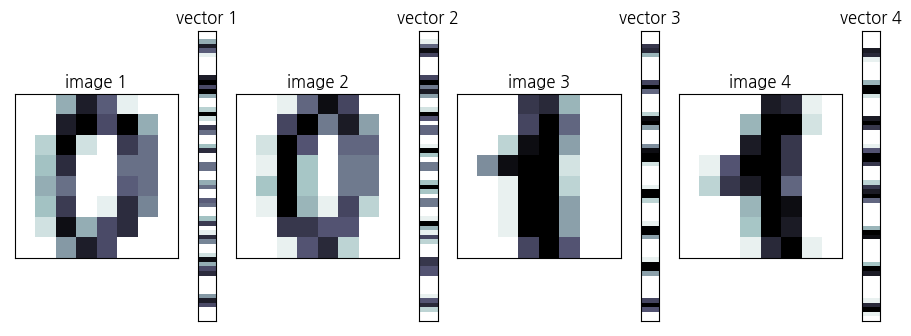

In [21]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

"0" 이미지와 "1" 이미지, "1" 이미지와 "1" 이미지의 내적의 값은

In [23]:
(v1.T @ v3)[0][0], (v3.T @ v4)[0][0]


(1866.0, 3661.0)

### 연습 문제 2.2.3
다음 코드를 실행하면 MNIST 숫자 이미지 전체 데이터를 모두 벡터로 변환하여 하나의 넘파이 행렬 X를 만든다. 

이 행렬을 이용하여 다음 문제를 풀어라.

```
from sklearn.datasets import load_digits
X = load_digits().data
```

(1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.

(2) 내적을 이용하여 모든 이미지의 조합에 대해 유사도를 구하라. 어떻게 구현하는 것이 효율적일까? (힌트 : 이 문제는 뒤에서 배울 행렬과 행렬의 곱셈을 이용한다.)

In [40]:
from sklearn.datasets import load_digits
X = load_digits().data

print(X[0] @ X[9])

ret = np.empty((X.shape[0], X.shape[0]))

for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if i >= j:
            ret[i][j] = ret[j][i] = X[i]@X[j]

print(ret)


2807.0
[[3070. 1866. 2264. ... 2812. 3006. 2898.]
 [1866. 4209. 3432. ... 3906. 3083. 3307.]
 [2264. 3432. 4388. ... 4005. 3063. 3697.]
 ...
 [2812. 3906. 4005. ... 5092. 3729. 4598.]
 [3006. 3083. 3063. ... 3729. 4316. 3850.]
 [2898. 3307. 3697. ... 4598. 3850. 4938.]]


### 선형회귀 모형 (linear regression model)

독립 변수 $x$에서 종속변수 $y$를 예측하는 방법의 하나

$$ y = w_1x_1 + ... + w_Nx_N $$

$$ y = w^Tx $$

### 선형회귀 모형의 단점
선형회귀 모형은 비선형적인 현실 세계의 데이터를 잘 예츨하지 못할 수 있다

예를 들어 집 값은 면적에 단순 비례하지 않는다

이러한 비선형적인 현실 세계의 데이터를 분석하기 위해 완전히 다른 모형을 쓰는 것보다는

선형회귀 모형을 기반으로 여러 기법을 사용해 수정한 모형을 사용하는 것이 일반적이다

### 제곱합 (sum of squares)

$$ x^Tx = [x_1 x_2 ... x_N]^T[x_1 x_2 ... x_N] = \sum_{i=1}^N{x_{i}^{N}} $$

### 행렬과 행렬의 곱셈
$A$ 행렬과 $B$ 행렬을 곱한 결과가 $C$ 행렬이 된다고 하자
$C$의 $i$ 번째 행, $j$ 번째 열의 원소 $c_{ij}$의 값은 $A$ 행렬의 $a_i^T$와 $B$ 행렬의 $b_j$의 곱이다

$$ A = \left[ \begin{matrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{matrix} \right] $$
$$ B = \left[ \begin{matrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{matrix} \right] $$
$$ C = AB = \left[ \begin{matrix} 22 & 28 \\ 49 & 64 \end{matrix} \right]

In [43]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = A @ B
print(C)
print(np.matmul(A, B))

[[22 28]
 [49 64]]
[[22 28]
 [49 64]]


### 교환 법칙과 분배 법칙
행렬의 곱셈은 교환 법칙이 성립하지 않음
$$ AB \neq BA $$
그러나 덧셈에 대한 분배 법칙은 성립함
$$ A(B + C) = AB + AC $$
$$ (A + B)C = AC + BC $$

전치 연산도 덧셈/뺄셈에 대해 분배 법칙이 성립함
$$ (A + B)^T = A^T + B^T $$
곱셈의 경우 분배 법칙이 성립하기는 하지만 곱셈의 순서가 바뀜
$$ (AB)^T = B^TA^T $$
$$ (ABC)^T = C^TB^TA^T $$

### 열 벡터의 선형조합
행렬 $X$와 백터 $w$의 곱은 행렬 $X$를 이루는 열 벡터 $c_1, c_2, ... c_M$과 $w_1, w_2, ..., w_M$으로 선형 조합한 결과와 같다

$$ X_w = [c_1, c_2, ..., c_M]\left[ \begin{matrix} w_1 \\ w_2 \\ ... \\ w_M \end{matrix} \right] 
= w_1c_1 + w_2c_2 + ... + w_Mc_M $$

In [52]:
X = np.array([[1, 2, 3],[4, 5, 6]])
w = np.array([2, 3, 4])

Y1 = np.zeros((1, 2), dtype=int)
Y2 = X @ w
for i in range(X.shape[1]):
    Y1 += X[:, i]*w[i]

print(Y1)
print(Y2)

[[20 47]]
[20 47]


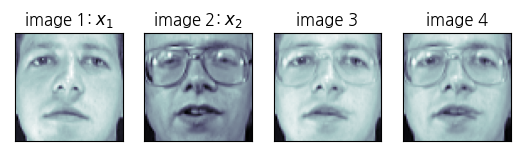

In [55]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 4)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3")

new_face = 0.5 * faces.images[6] + 0.5 * faces.images[10]
ax[3].imshow(new_face, cmap=plt.cm.bone)
ax[3].grid(False)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].set_title("image 4")

plt.show()

### 여러 개의 벡터에 대한 가중합 동시 계산

벡터 하나의 가중합은 $w^Tx$로 표시할 수 있다

만약 가중합을 하나의 벡터 $x$가 아니라 여러 벡터 $x_1, x_2, .. x_M$에 대해 모두 계산해야 하면 어떻게 해야 할까?

$y = Xw$ 수식으로 간단히 표시할 수 있다 (여기서 $X$는 벡터가 아닌 행렬)

$$ Xw = \left[ \begin{matrix} x_1^T \\ x_2^T \end{matrix}\right] 
\left[ \begin{matrix} w_1 \\ w_2 \\ w_3 \end{matrix}\right]
= \left[ \begin{matrix} x_1^Tw \\ x_1^Tw \end{matrix}\right] $$

### 잔차 (residual)
예측치와 실젯값(target)과의 차이를 오차(error) 혹은 잔차(residual)이라 한다.

$$ e_i = y_i - \hat{y_i} = y_i - x^Tw $$

$$ e = y - Xw $$

### 잔차 제곱합 (RSS: Residual Sum of Square)
잔차의 크기는 잔차 벡터의 각 원소를 제곱한 뒤 더한 잔차 제곱합을 이용해 구한다 (= $e^Te$)

$$ \sum_{i=1}^N{e_i^2} = (y-Xw)^T(y-Xw)

### 행렬 놈

행렬은 부호와 크기를 정의하기 어렵다

하나의 행렬에 대해 실수 하나를 대응시키기 위한 개념으로 놈 (norm), 대각합 (trace), 행렬식 (determinant)를 사용한다

행렬의 놈 (norm)은 행렬 $A$에 대해 다음 식으로 정의되는 숫자다

$$ \Vert A \vert _p = \left(\sum_{i=1}^{N}{\sum_{j=1}^{M}{\vert a_{ij} \vert ^p}} \right)^{1/p} $$

여기서 $p$는 보통 1, 2 또는 무한대가 사용되는데 이 중 $p=2$인 경우가 가장 많이 쓰이므로

$p$ 표시가 없는 경우는 2인 놈이라고 생각하면 된다 (=Frobenius norm; $ \Vert A \Vert _F$)

놈의 정의에서 놈은 항상 0보다 크거나 같다

벡터의 놈은 놈의 제곱이 벡터의 제곱합과 같다는 것이다

$$ \Vert x \Vert ^2 = x^Tx = \sum_{i=1}^N{x_i^2} $$

In [68]:
import numpy as np

A = (np.arange(9) - 4).reshape((3, 3))
print(A)
print(np.linalg.norm(A))

[[-4 -3 -2]
 [-1  0  1]
 [ 2  3  4]]
7.745966692414834


In [69]:
A = np.array([1, 2, 3])
print(A.T @ A)
print(np.linalg.norm(A) ** 2)

14
14.0


### 대각합 (Trace)
대각합 (trace)는 정방행렬에 대해서만 정의되며 다음처럼 대각원소의 합으로 계산된다

$$ tr(A) = a_{11} + a_{22} + ... + a_{NN} = \sum_{i=1}^N{a_{ii}} $$

### 행렬식
정방행렬 $A$의 행렬식 (determinant)는 $det(A), detA$ 또는 $\vert A \vert$라는 기호로 표기한다

$$ det(A) = \sum_{i=1}^N{\sum{((-1)^{i+j_0}M_{i,j_0})a_{i,j_0}}} $$

## 2.4 선형 연립방정식과 역행렬
### 선형 연립방정식

복수의 미지수를 포함하는 복수의 선형 방정식을 선형 연립방정식 (system of linear equation)이라고 한다

$$ Ax = b $$

$A$는 계수행렬 (coefficient matrix)

$x$는 미지수벡터 (unknown vector)

$c$는 상수벡터 (constant vector)라고 부른다

### 역행렬

$ Ax = b $가 상수의 곱셈이라면 방정식은 나눗셈을 이용할 수 있을 것이다

$$ x = b / A $$

그러나 행렬에는 나눗셈이 없으므로 이 방법은 사용할 수 없다

정방 행렬 $A$에 대한 역행렬 (inverse matrix) $A^{-1}$는 다음 관계를 만족하는 행렬을 말한다

$$ A^{-1}A = AA^{-1} = I $$

역행렬은 항상 존재하는 것이 아니다

역행렬이 존재하는 행렬: invertible matrix, regular matrix, non-singular matrix

역행렬이 존재하지 않는 행렬: non-invertible matrix, singular matrix

### 최소 자승 문제 (least square problem)

`lstsq()` 명령은 행렬 $A$와 $b$를 인수로 받고 최소 자승 문제의 답 `x`와 RSS `resid`, 랭크 `rank`, 특잇값 (singular value) `s`를 반환한다



In [73]:
A = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1]])
b = np.array([[2], [2], [3]])

Ainv = np.linalg.inv(A)
x = Ainv @ b
print(x)


x, resid, rank, s = np.linalg.lstsq(A, b)
print(x)

[[1.]
 [1.]
 [1.]]
[[1.]
 [1.]
 [1.]]


/tmp/ipykernel_241178/1518137491.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, resid, rank, s = np.linalg.lstsq(A, b)


### 미지수의 수와 방정식의 수

1. 방정식의 수가 미지수의 수와 같을 때 ($N=M$) => 선형 방정식의 해
2. 방정식의 수가 미지수의 수보다 적을 때 ($N<M$) => 무수히 많은 해
3. 방정식의 수가 미지수의 수보다 클 때 ($N>M$) => 모두 만족하는 해가 존재하지 않을 수 있음 (보통의 경우)

최소 자승 문제에서 벡터의 놈을 최소하하는 문제를 푼다

$$ e^Te = (Ax-b)^T(Ax-b) $$
$$ x = arg\min_{x}{e^Te} = arg\min_x{(Ax-b)^T(Ax-b)} $$

$A^TA$는 항상 정방행렬이므로 $Ax = b$의 양변에 $A^T$를 곱하면

$$ A^TAx = A^Tb $$

만약 정방행렬 $A^TA$의 역행렬이 존재한다면

$$ (A^TA)^{-1}(A^TA)x = (A^TA)^{-1}A^Tb $$

여기서 행렬 $(A^TA)^{-1}A^T$를 행렬 $A$의 의사역행렬이라고 한다

넘파이의 `lstsq()` 명령은 이러한 최소 자승 문제를 푸는 명령이다

In [75]:
A = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 2]])
b = np.array([[2], [2], [3], [4.1]])
Apinv = np.linalg.inv(A.T @ A) @ A.T
x = Apinv @ b

print(x)

x, resid, rank, s = np.linalg.lstsq(A, b)
print(x)

[[1.03333333]
 [0.95      ]
 [1.05      ]]
[[1.03333333]
 [0.95      ]
 [1.05      ]]


/tmp/ipykernel_241178/1079290871.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, resid, rank, s = np.linalg.lstsq(A, b)


In [80]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

x, resid, rank, s = np.linalg.lstsq(X, y)

idx = ['crim', 'indus', 'nox', 'rm', 'lstat', 'b', 'ptratio', 'zn', 'chas', 'age', 'rad', 'dis', 'tax']

for i, c in enumerate(idx):
    print("{} : {}".format(c, x[i]))



crim : -0.09289651702764272
indus : 0.04871495518300262
nox : -0.004059979575062827
rm : 2.8539988199939685
lstat : -2.86843637041282
b : 5.928147779052685
ptratio : -0.007269334576054748
zn : -0.9685141573950705
chas : 0.17115112829438597
age : -0.009396215397158986
rad : -0.39219092629485175
dis : 0.014905610228202068
tax : -0.416304470737456


/home/uni/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 